# Analysis of the Dallas Crime Dataset
#### By Jean Jecha, Sharon Teo, Jessica Wheeler

--------------------------------------------------------------------------


## Introduction and Business Purpose

   Crime datasets can provide a wealth of useful information not only for the police department but also for the citizens that live in the area as well as people looking to move to a new city.  Citizens want to know what types of crimes occur in their city and how often they occur as this is often used to guage the safety and liveability of a city.  When people look to move to a new area, a useful tool they can look at is a crime map provided by an application.  Real estate apps are also including crime ratings and maps to provide information to those who are looking for a new home.
   
   More importantly, the analysis of crime data would be most useful to a city's police department.  Creating useful visualizations can provide valuable information about what types of problem areas a city is experiencing.   More cities are starting to hire crime data analysts in order to assess problem areas and deploy police officers to areas that need the most attention.
   
   Crime data analysis can also show whether solutions that were implemented were effective, if at all.  For example, if the data show that the city has serious drug related crimes, as a result the deparment may decide to implement more crackdowns and the city may publish information about how to get help on their website.  Analysis of crime data the following years can show whether or not these actions helped reduce drug related crimes in the city.  The department and the city can make more data driven decisions based on useful analysis of crime data.
   

## The Dataset

We chose the Dallas Crime dataset, available at https://www.dallasopendata.com/Public-Safety/Police-Incidents/tbnj-w5hb.  The site also has metadata about the dataset as well as descriptions for each of the attributes.  The Dallas Crime dataset has a sufficient number of rows- 196k, and a large amount of columns - 102.  This would enable us to choose the most interesting attributes to focus our analysis on.  Some of the attributes in this dataset include Type of Incident, Year, Month, Day, and Time of the beginning of the occurrence as well as the end of occurrence, watch, location- latitude and logitude as well as neighborhood and division, call (911) problem, and whether the incident was classified as a gang or drug related offense. Analyzing these attributes will give us a lot of insight to the dataset and ultimately as to how safe the city of Dallas is.  More importantly, crime data analysis would give insight to the Dallas Police Department as to where and when to focus their resources.

   Our dataset contained crimes going back to 2003 but were not recoded until between 2014 and 2017.  For example, a crime might have occurred in 2003 but not discovered until 2016, such as fraud, embezzlement, forgery, and counterfeit.  In looking at the dataset, most of the more complete information recorded started in 2015-2017.  Thus, for our analysis, we used data that only ocurred in 2016, using the attribute Year1ofOccurrence.


## Our Analysis

#### Overview
We started off looking at the entire dataset and then decided on certain attributes to keep for analysis.  After tidying up the dataset, we focused on looking at the number of incidents overall.  How much crime was there in Dallas in 2016?  What were the highest occurring incidents?

Then we explored when these incidents occurred.  What was the month, day, and watch or shift, that these incidents tended to peak and what can we infer from this?

The next important question would be where.  Where did most of these incidents occur? Is there a community or division that saw an outstanding amount of crime?  This would be a great indication as to where the Dallas PD should place more resources.

We then looked into the average time it takes officers to work on an incident.  Are there areas wherein the officers are spending a lot more time resolving issues?
Lastly we looked at victim conditions as these are the results of violent crime.  Where did the more violent crimes occur?  Were victim deaths a result of gang or drug related incidents?



In [1]:
# Load Dallas Crime Dataset
# Orginal dataset from https://www.dallasopendata.com/Public-Safety/Police-Incidents/tbnj-w5hb

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# read in the csv file
df = pd.read_csv('/Users/JessicaSibal/Downloads/Police_Incidents.csv')
df.head()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,﻿Incident Number w/ Year,Year of Incident,Incident Number wo/ Year,Offense Service Number,Service Number ID,Watch,Call (911) Problem,Type of Incident,Penalty Class,Type of Location,...,UCR Offense Name,UCR Offense Description,Offense Type,Modus Operandi (MO),Family Offense,Hate Crime,Gang Related Offense,Victim Package,Drug Related Incident,Update Date
0,000003-2017,2017,3,000003E,000003-2017-01,3,07 - MINOR ACCIDENT,UCR - ASSAULT (AGG) M/V,NaN,"Highway, Street, Alley ETC",...,VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,PART2,A/P INTENTIONALLY STRUCK COMP'S VEHICLE WITH H...,No,NaN,UNK,NaN,UNK,01/09/2017 02:10:32 PM
1,000003-2017,2017,3,000003E,000003-2017-02,3,07 - MINOR ACCIDENT,UCR - ASSAULT (AGG) M/V,NaN,"Highway, Street, Alley ETC",...,VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,PART2,A/P INTENTIONALLY STRUCK COMP'S VEHICLE WITH H...,No,NaN,UNK,NaN,UNK,01/09/2017 02:10:32 PM
2,000003-2017,2017,3,000003E,000003-2017-03,3,07 - MINOR ACCIDENT,UCR - ASSAULT (AGG) M/V,NaN,"Highway, Street, Alley ETC",...,VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,PART2,A/P INTENTIONALLY STRUCK COMP'S VEHICLE WITH H...,No,NaN,UNK,NaN,UNK,01/09/2017 02:10:32 PM
3,000004-2016,2016,4,000004D,000004-2016-01,3,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,FS,"Highway, Street, Alley ETC",...,UUMV,AUTO THEFT - UUMV,PART1,UUMV,No,NaN,No,NaN,No,04/20/2016 09:00:30 AM
4,000004-2017,2017,4,000004E,000004-2017-01,3,6XEA - DISTURBANCE EMERG AMB,ASSAULT -BODILY INJURY ONLY,MA,Single Family Residence - Occupied,...,ASSAULT,ASSAULT,Part2,SUSPECT ASSAULT COMPLAINANT WITH HANDS CAUSING...,No,NaN,No,NaN,No,01/05/2017 12:58:48 PM


In [2]:
#Removing spaces from headers to clean them up
#http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

df.columns = [x.strip().replace(' ', '') for x in df.columns]
df.columns = [x.strip().replace('/', '') for x in df.columns]
df.columns = [x.strip().replace('(', '') for x in df.columns]
df.columns = [x.strip().replace(')', '') for x in df.columns]
df.columns = [x.strip().replace('-', '') for x in df.columns]

In [3]:
#Now Let's take a look at our cleaned headers - beautiful!
df.head()

,﻿IncidentNumberwYear,YearofIncident,IncidentNumberwoYear,OffenseServiceNumber,ServiceNumberID,Watch,Call911Problem,TypeofIncident,PenaltyClass,TypeofLocation,...,UCROffenseName,UCROffenseDescription,OffenseType,ModusOperandiMO,FamilyOffense,HateCrime,GangRelatedOffense,VictimPackage,DrugRelatedIncident,UpdateDate
0,000003-2017,2017,3,000003E,000003-2017-01,3,07 - MINOR ACCIDENT,UCR - ASSAULT (AGG) M/V,NaN,"Highway, Street, Alley ETC",...,VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,PART2,A/P INTENTIONALLY STRUCK COMP'S VEHICLE WITH H...,No,NaN,UNK,NaN,UNK,01/09/2017 02:10:32 PM
1,000003-2017,2017,3,000003E,000003-2017-02,3,07 - MINOR ACCIDENT,UCR - ASSAULT (AGG) M/V,NaN,"Highway, Street, Alley ETC",...,VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,PART2,A/P INTENTIONALLY STRUCK COMP'S VEHICLE WITH H...,No,NaN,UNK,NaN,UNK,01/09/2017 02:10:32 PM
2,000003-2017,2017,3,000003E,000003-2017-03,3,07 - MINOR ACCIDENT,UCR - ASSAULT (AGG) M/V,NaN,"Highway, Street, Alley ETC",...,VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,PART2,A/P INTENTIONALLY STRUCK COMP'S VEHICLE WITH H...,No,NaN,UNK,NaN,UNK,01/09/2017 02:10:32 PM
3,000004-2016,2016,4,000004D,000004-2016-01,3,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,FS,"Highway, Street, Alley ETC",...,UUMV,AUTO THEFT - UUMV,PART1,UUMV,No,NaN,No,NaN,No,04/20/2016 09:00:30 AM
4,000004-2017,2017,4,000004E,000004-2017-01,3,6XEA - DISTURBANCE EMERG AMB,ASSAULT -BODILY INJURY ONLY,MA,Single Family Residence - Occupied,...,ASSAULT,ASSAULT,Part2,SUSPECT ASSAULT COMPLAINANT WITH HANDS CAUSING...,No,NaN,No,NaN,No,01/05/2017 12:58:48 PM


In [4]:
# Narrowing down our focus to the attributes mentioned in the Dataset 
# description by removing columns not used in analysis

for col in ['OffenseServiceNumber','ServiceNumberID','ReportingArea','Beat','Sector','CouncilDistrict',
            'DPDSwornMarshallsinvolved','ComplainantHomeAddress','ComplainantApartment','ComplainantZipCode',
            'ComplainantCity','ComplainantState','ComplainantBusinessName','ComplainantBusinessAddress',
            'YearAssignment','Weather','RespondingOfficer#1BadgeNo','RespondingOfficer#1Name','RespondingOfficer#2BadgeNo',
            'RespondingOfficer#2Name','ReportingOfficerBadgeNo','AssistingOfficerBadgeNo','ReviewingOfficerBadgeNo',
            'ElementNumberAssigned','InvestigatingUnit1','InvestigatingUnit2','SpecialReportPreRMS','UCRDisposition',
            'UCR1','UCR2PreRMS','FinalUCR','RMSCode','CJISCode','PenalCode','HateCrime','VictimPackage']:
    if col in df:
        del df[col]

In [9]:
# We want to clean up the time attributes and turn them from objects to time.
# Reference: http://stackoverflow.com/questions/16852911/how-do-i-convert-dates-in-a-pandas-data-frame-to-a-date-data-type
df['StartingDateTime'] = pd.to_datetime(df['StartingDateTime'])
df['EndingDateTime'] = pd.to_datetime(df['EndingDateTime'])

In [10]:
#Subset the dataset to years 2016 present
# Reference: http://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

df = df[df.Year1ofOccurrence == 2016]

In [11]:
#Let's get the specs of our subsetted data:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99178 entries, 0 to 195573
Data columns (total 66 columns):
﻿IncidentNumberwYear          99178 non-null object
YearofIncident                99178 non-null int64
IncidentNumberwoYear          99178 non-null int64
Watch                         99178 non-null object
Call911Problem                99165 non-null object
TypeofIncident                99178 non-null object
PenaltyClass                  84455 non-null object
TypeofLocation                99067 non-null object
TypeofProperty                27047 non-null object
StreetBlock                   97388 non-null float64
StreetDirection               3087 non-null object
StreetName                    97566 non-null object
IncidentAddress               98835 non-null object
ApartmentNumber               17565 non-null object
ZipCode                       98817 non-null float64
City                          98835 non-null object
State                         98749 non-null object
XCoordi

## How much crime was there in Dallas in 2016?

In [70]:
print df.Year1ofOccurrence.count()

99178


As we can see in the results above, there were 99,178 total incidents in Dallas in 2016.

Now let's look at the Types of incidents that occurred and the counts of those incidents.  We used the UCR Offense Description attribute, where UCR stands for Uniform Crime Reporting.

[<matplotlib.text.Text at 0x114869e10>, <matplotlib.text.Text at 0x114537ed0>]

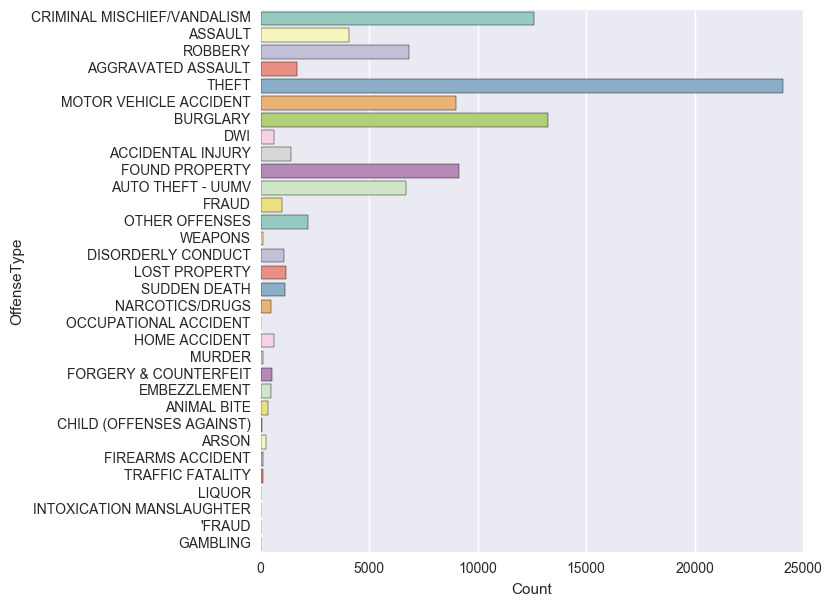

In [13]:
# Resource: http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plots
f, ax = plt.subplots(figsize=(7, 7))
sns.countplot(y='UCROffenseDescription', data=df, palette="Set3");
ax.set(xlabel='Count', ylabel='OffenseType')

From the plot above, the highest occurring incident is theft, followed by burglary and criminal mischief/vandalism.  Before we explore where these crimes occurred, let's take a look at the distribution of all incidents over the year.

### When did these crimes occur?

[<matplotlib.text.Text at 0x123fcc610>, <matplotlib.text.Text at 0x123fe5650>]

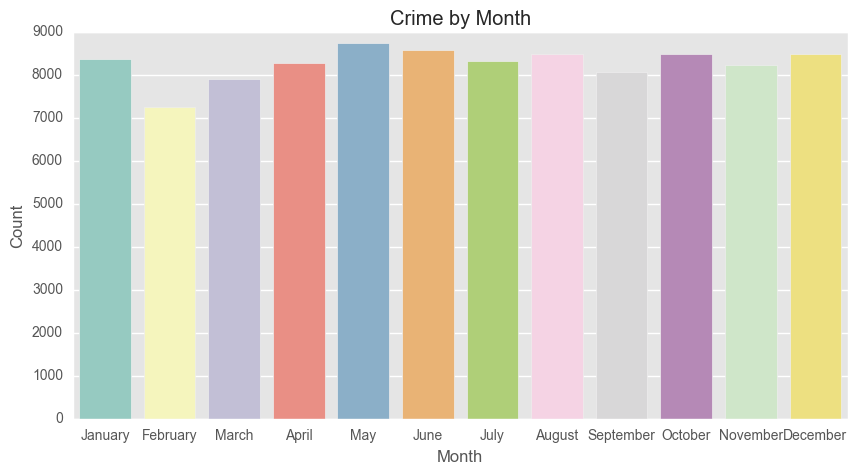

In [69]:
# Crimes by Month in Dallas in 2016
# Resource: http://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot

f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="Month1ofOccurence", data=df, order = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), palette="Set3")
plt.title('Crime by Month')
ax.set(xlabel='Month', ylabel='Count') 

Based on the graph, it appears that most crimes happen in the summer months, with a peak of incidents occurring in May.  The cause for this may be the weather.  With nicer weather comes more human activity which may have also resulted in more criminal activity.

There is also a high amount of crimes that occurred in December, which may be a result of the holidays with those that cannot afford to buy presents stealing presents instead.  January is another month that has a spike in incidents, which could be due to New Year's festivities.

The least amount of crimes happened in February, which makes sense since it is the shortest month of the year.

[<matplotlib.text.Text at 0x11552c990>, <matplotlib.text.Text at 0x114b4e1d0>]

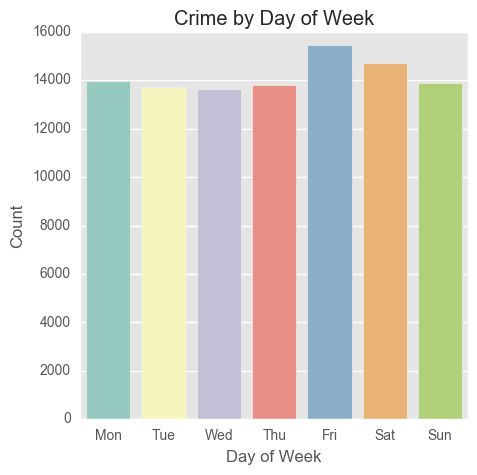

In [64]:
# Crimes by Day of the Week in Dallas in 2016
# Resource: http://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot

f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x="Day1oftheWeek", data=df, order = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), palette="Set3")
plt.title('Crime by Day of Week')
ax.set(xlabel='Day of Week', ylabel='Count') 

While there are a lot of crimes that occur every day of the week, Fridays and Saturdays are the days of the week where the most number of incidents occurred in Dallas in 2016.  On Fridays we see the number of crimes peak.  The reason for this could be that this is usually the end of the workweek and people may tend to get in more trouble after work (ie. drinking and driving or vandalism).  

Now let's explore if this translates to watch, or shifts, that the police are working.  The first watch/shift is usually from 7am-5pm, the second watch is from 3pm-1am, and the 3rd watch is from 9pm-7am.  The watches overlap each other for a few hours, nevertheless, we can find some very useful information in analyzing which watch sees the most activity.

[<matplotlib.text.Text at 0x129232cd0>, <matplotlib.text.Text at 0x12c9bac50>]

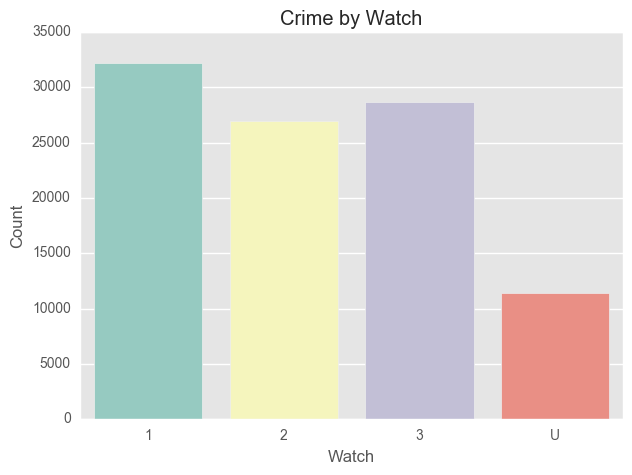

In [74]:
# Resource: http://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="Watch", data=df, order = '123U', palette="Set3")
plt.title('Crime by Watch')
ax.set(xlabel='Watch', ylabel='Count')

Our initial predicition is that we would see the most crimes on the third watch as one would guess that criminal activity would peak overnight when people may be intoxicated.  However, as the graph shows above, the first watch saw the most crimes.  This indicates that a lot of the crimes happened between 7am-5pm.  There is a possibility that criminals do not have jobs, therefore they must find other ways, criminal ways, to make their money. These incidents could also possibly be traffic related crimes as more people are on the road during the day vs. at night.

## Crimes by Location

We want to look at the crimes that occurred by community to see if certain communities need more resources than others.  Below is our analysis by community based on the dataset.  However, caution must be taken in looking at these results as there were a lot of incidents wherein 'Community' was not entered.  As shown when we looked at df.info() previously, Community had 9,735 instances whereas Division had 99,158 instances.  Therefore, Division is a better indication of the location of these crimes but taking a look at Community doesn't hurt and can give some insight.

Community
BryanHenderson_PFA        0.042013
Chaucer_PFA               0.113508
FergusonWoodmeadow_PFA    0.053210
FivePoints_PFA            0.036775
ForestAudelia_PFA         0.132101
KiestPolk_PFA             0.040164
KitMaham_PFA              0.104879
LakeCliff_PFA             0.020442
MLK_PFA                   0.038726
Malcolm_PFA               0.046225
Maple_PFA                 0.020853
McCallumCoit_PFA          0.023832
Northwest_PFA             0.221161
OvertonIllinois_PFA       0.026708
PeakColumbia_PFA          0.029276
PembertonHill_PFA         0.007396
Whitehurst_PFA            0.042732
Name: Community, dtype: float64


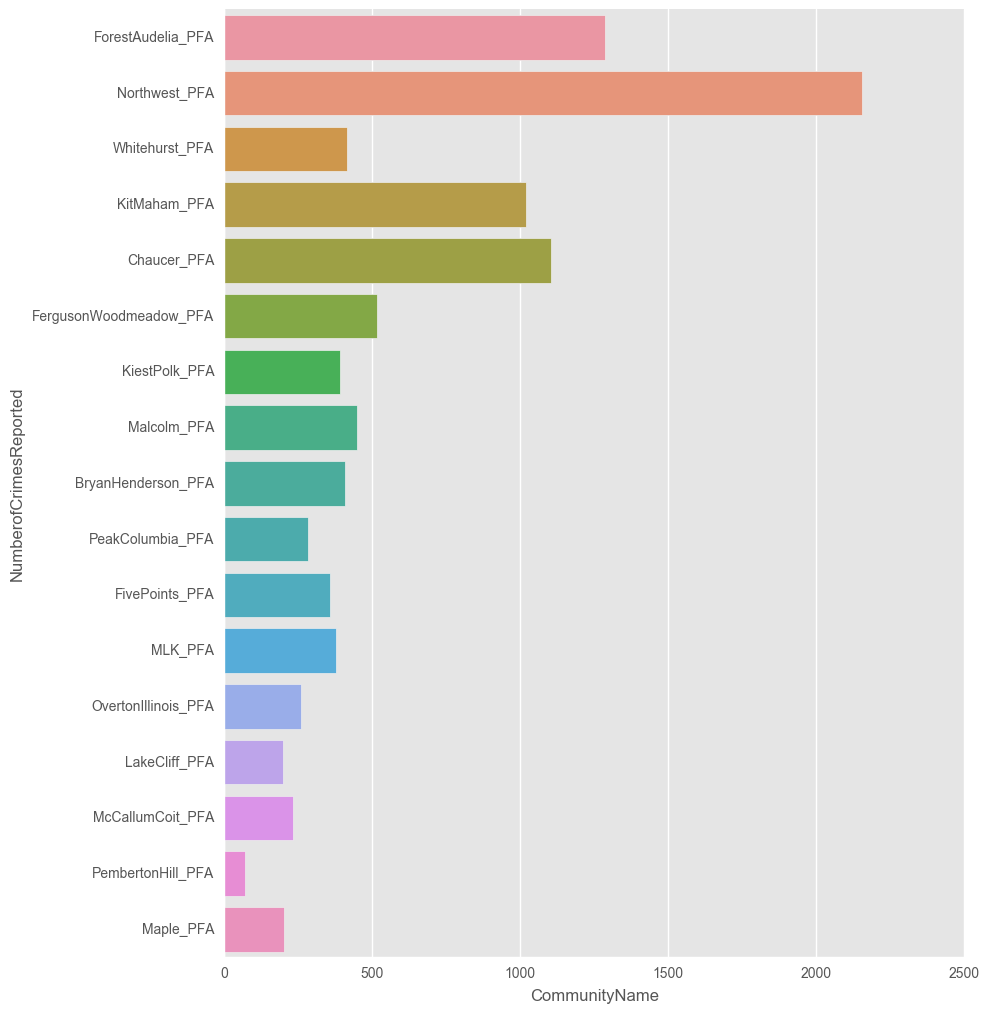

In [93]:
#Rates of incidents for each community
df_grouped = df.groupby(by='Community')
print (df_grouped.Community.count()/df.Community.count())

g = sns.factorplot(y='Community', data=df, kind='count', size=10)
g.set_axis_labels('CommunityName', 'NumberofCrimesReported')
#This shows the community most affected by crime

It looks like the NortWest PFA Community had the most crimes that were actually recorded.  To get a clearer, more accurate view of location, we looked at crimes by Division.

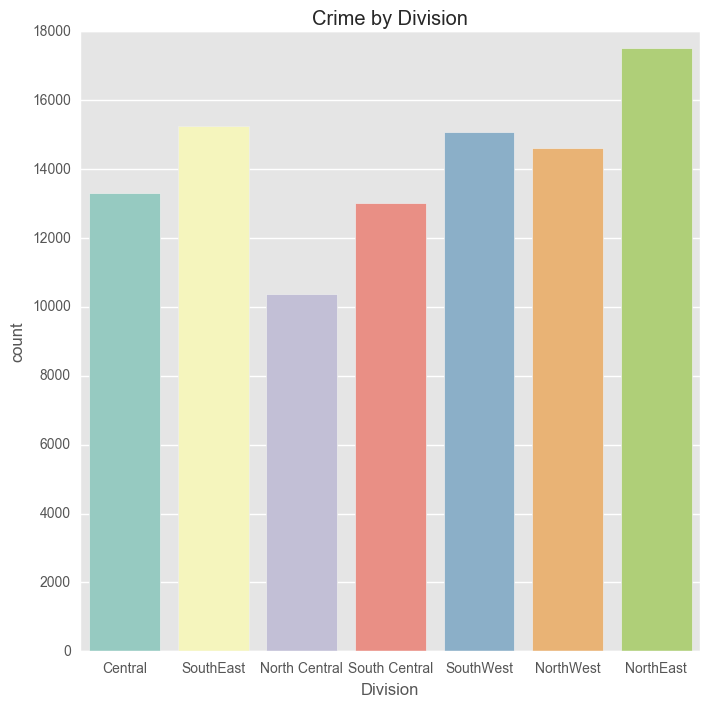

In [91]:
# Crimes by Division
f, ax = plt.subplots(figsize=(8, 8))
sns.countplot(x="Division", data=df, palette="Set3")
plt.title('Crime by Division')

The NortEast Division of Dallas saw the most crimes in 2016, followed by the SouthEast Division.  These areas may be more populated than the other areas, resulting in more crime. NorthCentral Division had the least amount of incidents and seems to be the safest area in regards to amount of crimes. 
It would be interesting to see the average income of each of these divisions and/or the average home prices to see if that plays a role in crime rates.

Now that we've taken a look at the number of crimes overall and when they occurred, our next question of interest was how long do these incidents occur?

### Average Time of Crimes

In [19]:
# Calculate the time difference from start to finish of a call
# Reference: http://www.itgo.me/a/x791470639852744898/calculate-pandas-dataframe-time-difference-between-two-columns-in-hours-and-minu
df['time_diffm'] = (df['EndingDateTime'] - df['StartingDateTime']).astype('timedelta64[m]')
df['time_diffh'] = (df['EndingDateTime'] - df['StartingDateTime']).astype('timedelta64[h]')

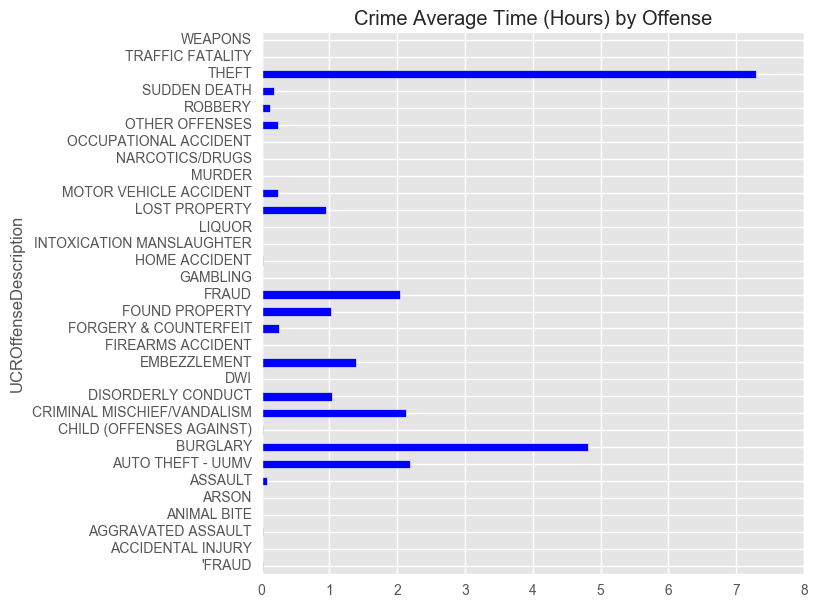

In [94]:
# Average time (hours) by Crime
plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(7, 7))
df_grouped = df.groupby(by='UCROffenseDescription')
minute_rate = ((df_grouped.time_diffm.sum()/df.IncidentNumberwoYear.count()/60))
ax = minute_rate.plot(kind='barh', color="blue", title='Crime Average Time (Hours) by Offense')

The graph above tells us which incidents take the most time on average for police to handle.  However, there are a lot of incidents wherein there does not seem to be a recorded time. Based on the data that we do have, theft incidents take about 7 hours and burglaries take about 5 hours.

Division
Central          4.128937
North Central    2.983860
NorthEast        3.705124
NorthWest        4.313584
South Central    2.456034
SouthEast        2.947413
SouthWest        3.533439
Name: time_diffm, dtype: float64


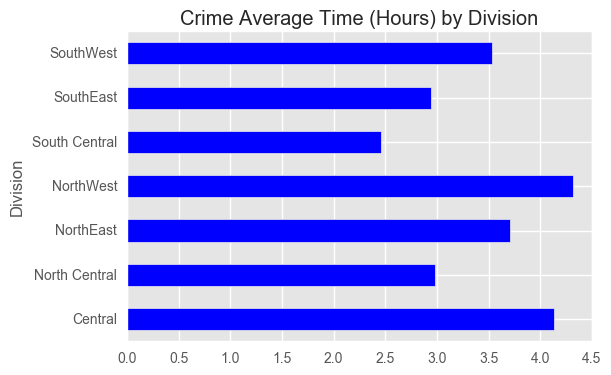

In [96]:
# Average time in hours by Division

df_grouped = df.groupby(by='Division')
print ((df_grouped.time_diffm.sum()/df.IncidentNumberwoYear.count())/60)

plt.style.use('ggplot')

df_grouped = df.groupby(by='Division')
minute_rate = ((df_grouped.time_diffm.sum()/df.IncidentNumberwoYear.count())/60)
ax = minute_rate.plot(kind='barh', color='blue', title='Crime Average Time (Hours) by Division')

We wanted to see which divisions took more time on average resvolving incidents and it appears that the NorthWest and Central divisons of Dallas took around 4-4.5 hours on average.  It may be due to a lack of resources or to the types of crimes occurring in that area.

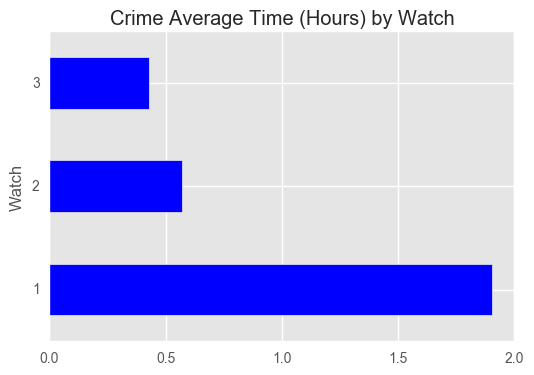

In [98]:
# Average time (hours) by Watch
plt.style.use('ggplot')

df_Watch = df[df.Watch != 'U']
df_grouped = df_Watch.groupby(by='Watch')
minute_rate = ((df_grouped.time_diffm.sum()/df_Watch.IncidentNumberwoYear.count())/60)
ax = minute_rate.plot(kind='barh', color='blue', title='Crime Average Time (Hours) by Watch')

In the First watch, incidents take almost 2 hours to handle on average.  This average time decreases in the second and third watches.  The types of incidents probably have an effect on average time.  Also, information recorded may not be the most accurate. Further analysis would confirm types of crimes in regards to average time for a specific incident within a watch.  Also, the Dallas PD may have more resources allocated to the first watch so they may take more time on an incident. There were also a lot of incidents that did not have accurate end times recorded, which may have occurred during the second or third watch.

### Victim Conditions

Lastly, we looked at victim conditions as these can be an indication of the violent and most dangerous crimes that occurred.  We also want to know where these violent crimes occurred as resources can be of most value to these areas.

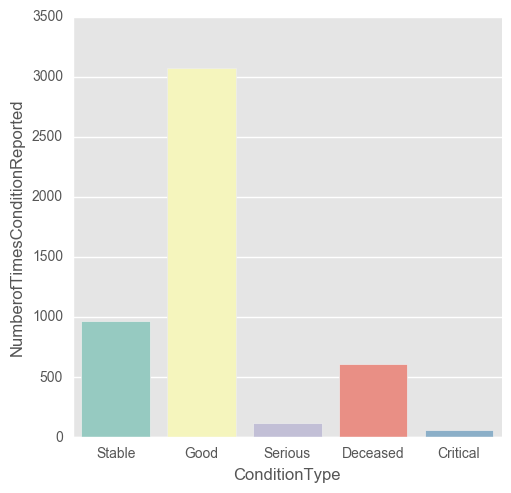

In [100]:
# Condition types of victims
g = sns.factorplot(x='VictimCondition', data=df, palette = "Set3", kind='count', size=5)
g.set_axis_labels('ConditionType', 'NumberofTimesConditionReported')
#look at what the frequency of victim conditions. Over 1000 are dead!

In [66]:
#Victim Condition by Division
pd.crosstab(df['Division'], df['VictimCondition'],margins='TRUE')

VictimCondition,Critical,Deceased,Good,Serious,Stable,All
Division,,,,,,
Central,8,52,480,13,155,708
North Central,3,81,260,8,75,427
NorthEast,10,114,611,19,157,911
NorthWest,9,70,441,17,126,663
South Central,14,100,499,22,156,791
SouthEast,10,96,357,24,175,662
SouthWest,7,99,422,16,124,668
All,61,612,3070,119,968,4830


In taking a closer look at victim conditions, we looked at victim conditions by Division.  As the table above shows, there were 612 total victims that died with the highest number of murders occurring in the NorthEast Division.  But is this truly the most dangerous neighborhood?  Which division has the highest proportion of murder?

In [68]:
#Crime Rates by Division
pd.crosstab(df['Division'], df['VictimCondition'],normalize='index')

VictimCondition,Critical,Deceased,Good,Serious,Stable
Division,,,,,
Central,0.011299,0.073446,0.677966,0.018362,0.218927
North Central,0.007026,0.189696,0.608899,0.018735,0.175644
NorthEast,0.010977,0.125137,0.670692,0.020856,0.172338
NorthWest,0.013575,0.105581,0.665158,0.025641,0.190045
South Central,0.017699,0.126422,0.630847,0.027813,0.197219
SouthEast,0.015106,0.145015,0.539275,0.036254,0.264350
SouthWest,0.010479,0.148204,0.631737,0.023952,0.185629


From the table above, 19% of crime on record in North Central resulted in someone dying, compared to only 12% in NorthEast. Unfortunately North Central should probably be considered the most dangerous division. As a result, the Dallas PD should place more resources in North Central due to a having the most severe type of crime.

Lastly, we want to see if any of the murders are gang or drug related.  There was not a lot of data under 'HateCrime' so we will omit it.

In [103]:
#learn about crosstabs at :http://pandas.pydata.org/pandas-docs/version/0.15.1/generated/pandas.crosstab.html
pd.crosstab(df['VictimCondition'], df['DrugRelatedIncident'])

DrugRelatedIncident,No,UNK,Yes
VictimCondition,,,
Critical,44,13,4
Deceased,479,114,18
Good,2602,387,81
Serious,74,27,18
Stable,631,244,93


In [104]:
pd.crosstab(df['VictimCondition'], df['GangRelatedOffense'])

GangRelatedOffense,No,UNK,Yes
VictimCondition,,,
Critical,47,11,3
Deceased,561,46,4
Good,2787,269,14
Serious,96,23,0
Stable,809,148,11


In looking at the gang related and drug related deaths, there were only 18 out of 611 total deaths for drug related incidents and 4 out of 611 deaths for gang related offenses.  These numbers are surprisingly low but indicate that deaths due to drug and/or gang related incidents are not a huge problem for Dallas.

# Exceptional Work

We wanted to generate a map that would be representative of the crimes that happened in Dallas in 2016, or at least one aspect of it.
We used
[method and packages used here]

# Conclusion

Using the Dallas Crime Dataset, we wanted to gain insight on the crimes that occurred in 2016- when and where they happened as this would give useful information that the Dallas PD can use.

First we took a look at the amount of incidents in Dallas in 2016 and according to the dataset, there were 99,178 total incidents.  Of these, the highest occurring incidents were theft, followed by burglary then criminal mischief/vandalism.  These are problem areas for Dallas that the Dallas PD and the city can address and remediate.

Then we took a look at when these crimes occurred and found that May saw the highest number of incidents as well as Fridays.  Also first watch, which is the first shift of the day, saw the most incidents.  Further exploration as to which incidents occurred on in May, and/or on Fridays (and what time on Fridays), as well as the First watch may be warranted to gain further knowledge.

Location is an important aspect as people and the Dallas PD would want to know where these crimes are happening.  We did an analysis of number of incidents according to community but caution should be taken when looking at this data since there were only a small number (9k) of instances where community was actually listed.  Thus, to get a better idea of location, we used Division.  We found that the Northwest Community had the most crimes and the NortEast Division and the SouthEast Division had the most crimes.  It would be interesting to see if average income and/or average home price has any correlation to these findings.

Then we pondered the question of how long does it take police to deal with certain crimes?  There were a lot of missing datapoints for this part of the analysis but what we did find was that theft and burglaries took the longest times to resolve.  We also looked at average time by Division to see if location had an influence and we found that the NortWest and Central divisions took the most time on average to resolve issues.  It would be great to see what specific problem areas these Divisions are experiencing.

The last thing we looked at was victim condition as this is a good indication of safety- where are the more violent crimes happening?  Were there a lot of deaths that were related to drug and/or gang involvement?
We found that the Nort Central Division had a 19% rate of a victim dying which is the highest of the divisions.  Interestingly, we found that just a small amount of deaths were related to drug and gang activity in Dallas.

-------------------------------------------------------------------------

#### Further Research

It would be interesting to do some predictive analysis on how long it takes an officer to arrive at a crime scene after a call is received. This information would give the police department great insight as to where to place their resources and how many areas may need more resources.  Also, there was a Call field that indicated the nature of the call.  It would be interesting to see how the nature of a call actually translates to the incident that actually happened and the severity of it.  For example, how many calls about domestic violence turn out to be murders?

Also, in the dataset there was a 'weather' column that turned out to be empty.  It would be interesting to merge a weather dataset based on time and location to see what kind of role weather may play in the types of crimes that occur.  For example, we would expect there to be less crimes such as theft during rainy weather and more traffic accidents to occur.

Another interesting aspect that may be a separate dataset would be looking into the use of force by police.  What types of incidents occur wherein the use of force is seen more often?  With this data, we would be able to see how often police use different weapons and in which situations.  Also, analysis of this type of dataset could give insight as to preventative actions to take with an officer if he or she may be more likely to react in a more extreme way.

We chose this dataset as it had a lot of attributes so there were a lot of directions to go with analysis.  We uncovered useful information generating basic graphics and visualizations using the dataset.  This information can be used not only by the Dallas PD but also by the citizens of Dallas and those looking to move to the Dallas area.